In [95]:
import statsmodels as sm 
import pandas as pd

In [96]:
data = pd.read_csv("data/sem_11/usconsumption.csv")
data['date'] = pd.PeriodIndex(data['date'].str.replace(" ", "-"), freq='Q').to_timestamp()
data.set_index("date")


,consumption,income
date,,
1970-01-01,0.612277,0.496540
1970-04-01,0.454930,1.736460
1970-07-01,0.874673,1.344881
1970-10-01,-0.272514,-0.328146
1971-01-01,1.892187,1.965432
...,...,...
2009-10-01,0.109329,-0.144713
2010-01-01,0.671018,1.187165
2010-04-01,0.717718,1.354355


In [97]:
# some example data
import numpy as np

import pandas

import statsmodels.api as sm

from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pandas.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(data)


results: VARResults = model.fit(5)
results.summary()

/Users/mszekhov/Desktop/current_projects/hse_ts_course/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Apr, 2024
Time:                     19:37:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.1736
Nobs:                     197.000    HQIC:                  -27.6498
Log likelihood:           1964.81    FPE:                7.10710e-13
AIC:                     -27.9736    Det(Omega_mle):     5.62280e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000780         0.001550            0.503           0.615
L1.realgdp         -0.247874         0.174257           -1.422           0.155
L1.realcons         0.644806         0.136359            4.729    

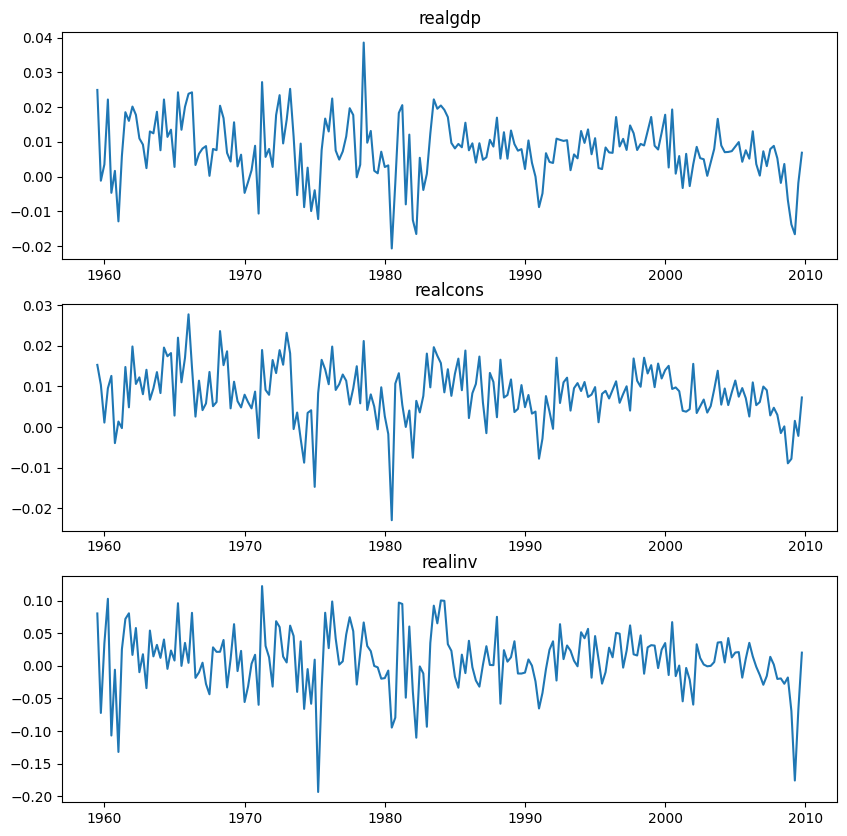

In [98]:
results.plot();

In [99]:
choice = model.select_order(15)
choice.summary()

,AIC,BIC,FPE,HQIC
0,-27.70,-27.65,9.358e-13,-27.68
1,-28.02,-27.82*,6.745e-13,-27.94*
2,-28.03,-27.66,6.732e-13,-27.88
3,-28.04*,-27.52,6.651e-13*,-27.83
4,-28.03,-27.36,6.681e-13,-27.76
5,-28.02,-27.19,6.773e-13,-27.69
6,-27.97,-26.98,7.147e-13,-27.57
7,-27.93,-26.79,7.446e-13,-27.47
8,-27.94,-26.64,7.407e-13,-27.41
9,-27.96,-26.50,7.280e-13,-27.37


In [100]:
results: VARResults = model.fit(maxlags=15, ic='bic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Apr, 2024
Time:                     19:37:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.7388
Nobs:                     201.000    HQIC:                  -27.8562
Log likelihood:           1963.94    FPE:                7.37174e-13
AIC:                     -27.9360    Det(Omega_mle):     6.94859e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003580         0.000911            3.928           0.000
L1.realgdp         -0.338056         0.172084           -1.964           0.049
L1.realcons         0.746283         0.130411            5.723    

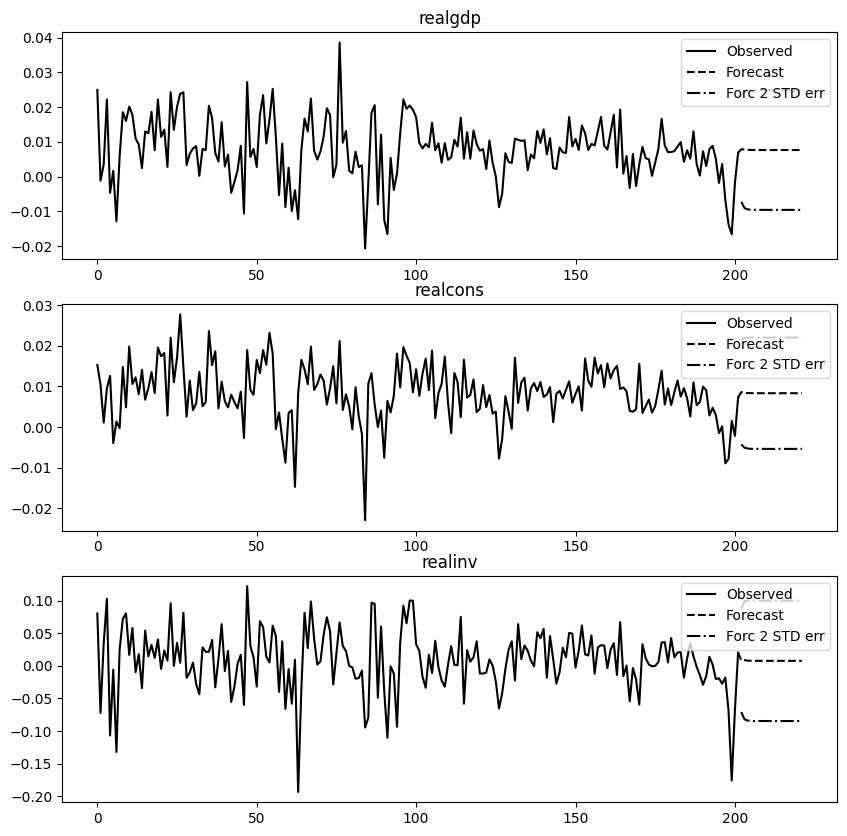

In [101]:
results.plot_forecast(20);

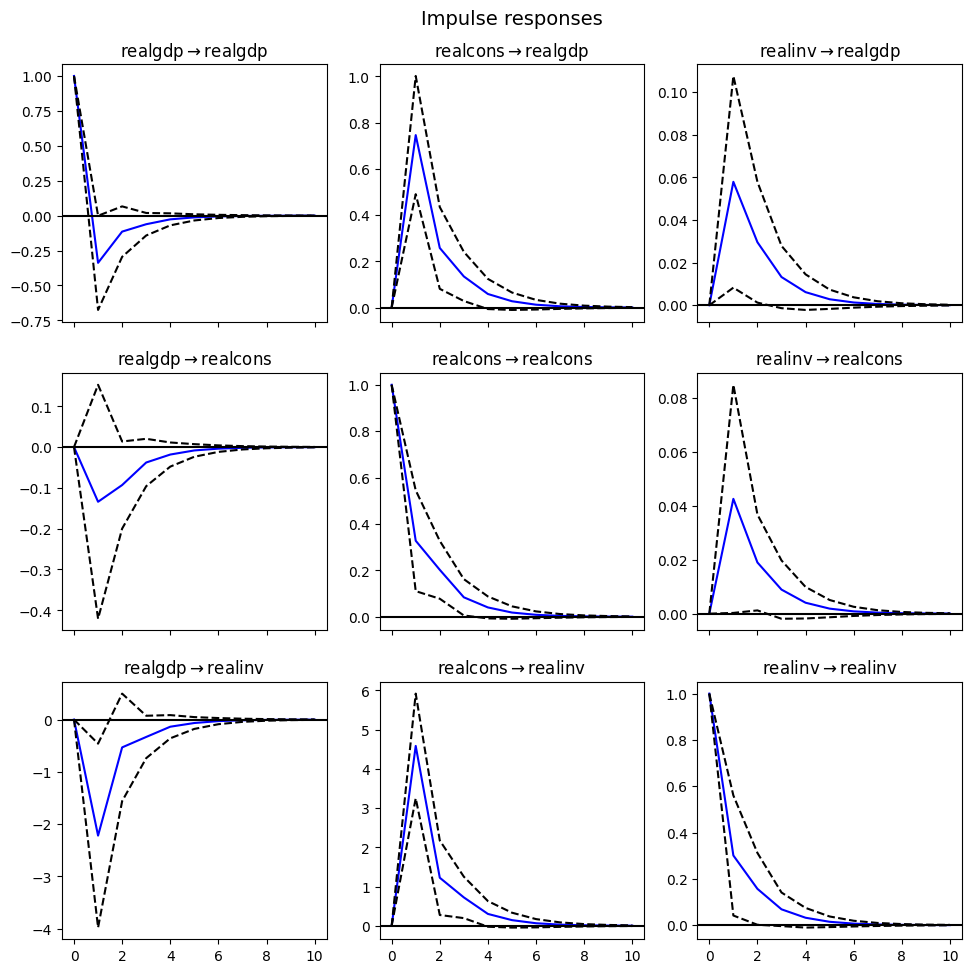

In [117]:
irf = results.irf(10)

irf.plot(orth=False);

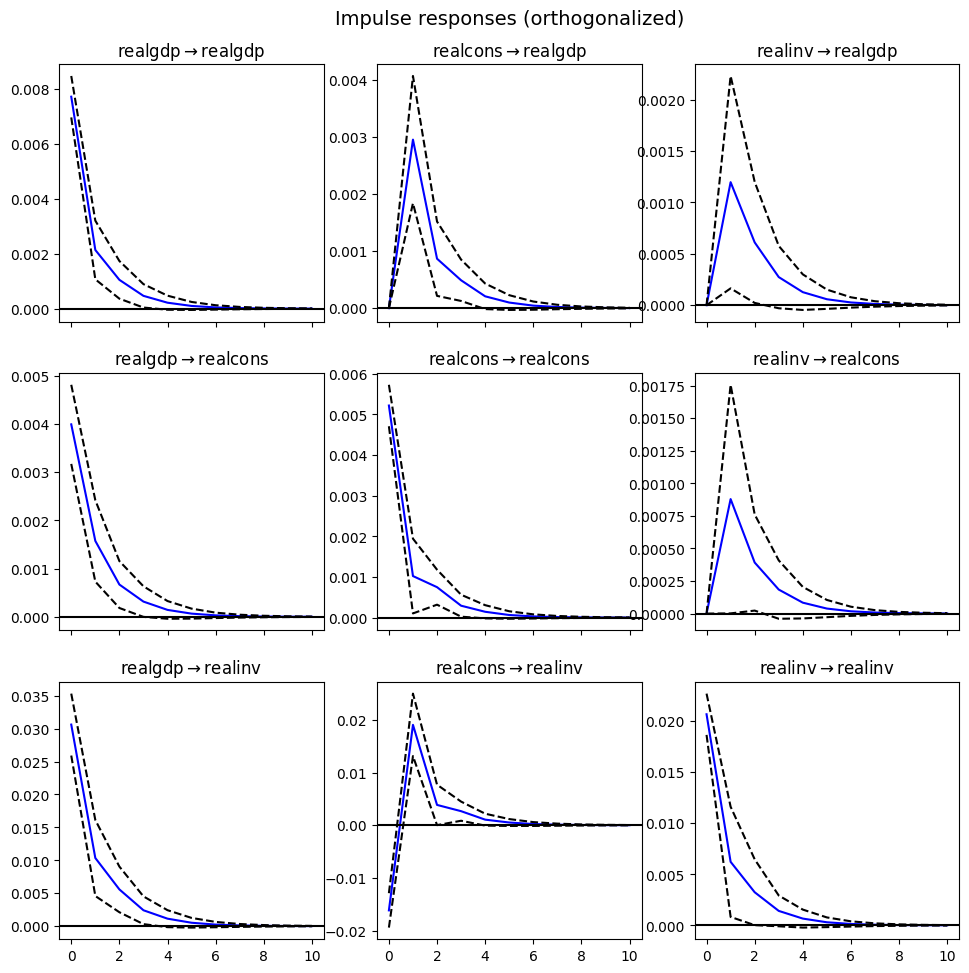

In [103]:
irf.plot(orth=True);

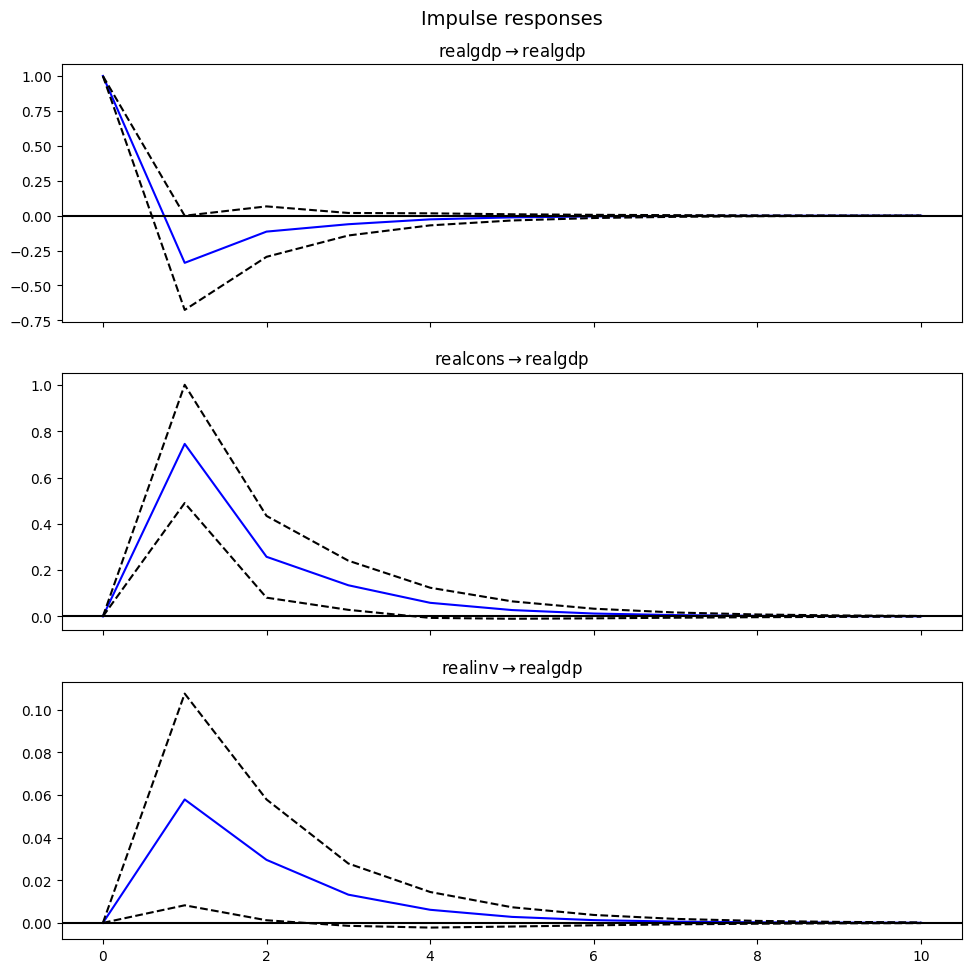

In [104]:
irf.plot(response='realgdp');

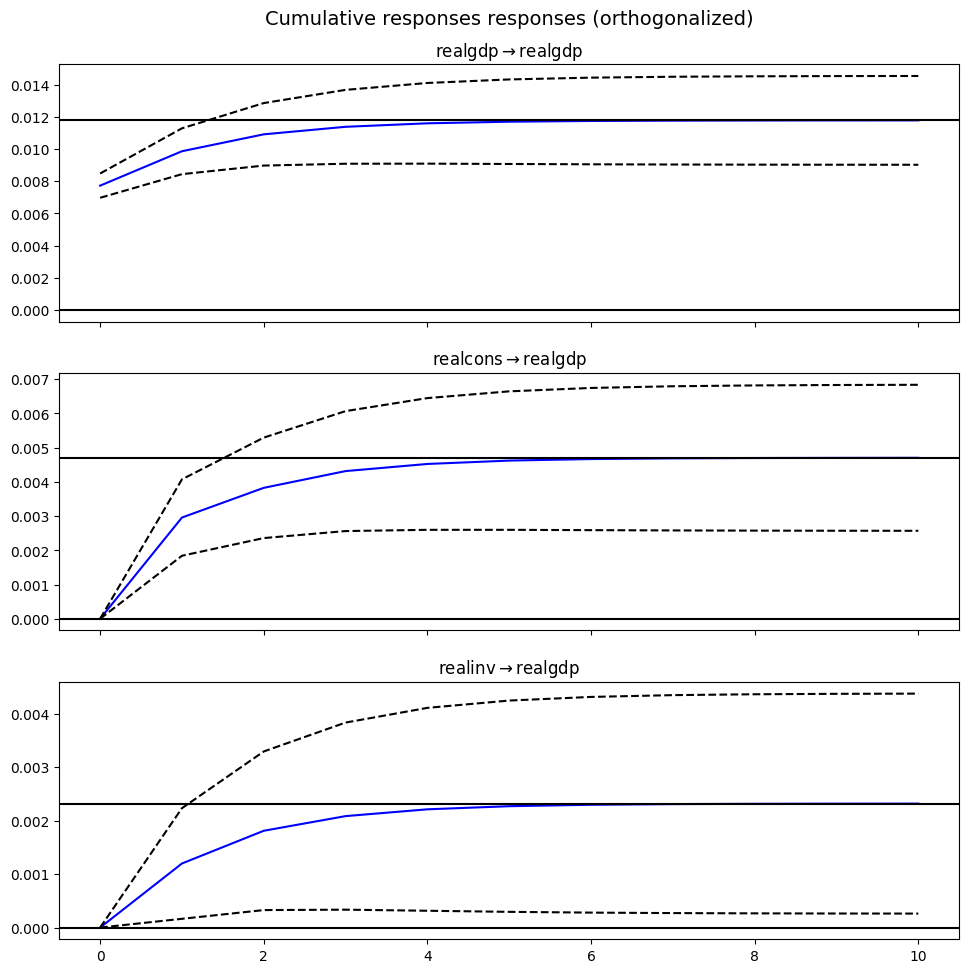

In [105]:
irf.plot_cum_effects(response="realgdp", orth=True);

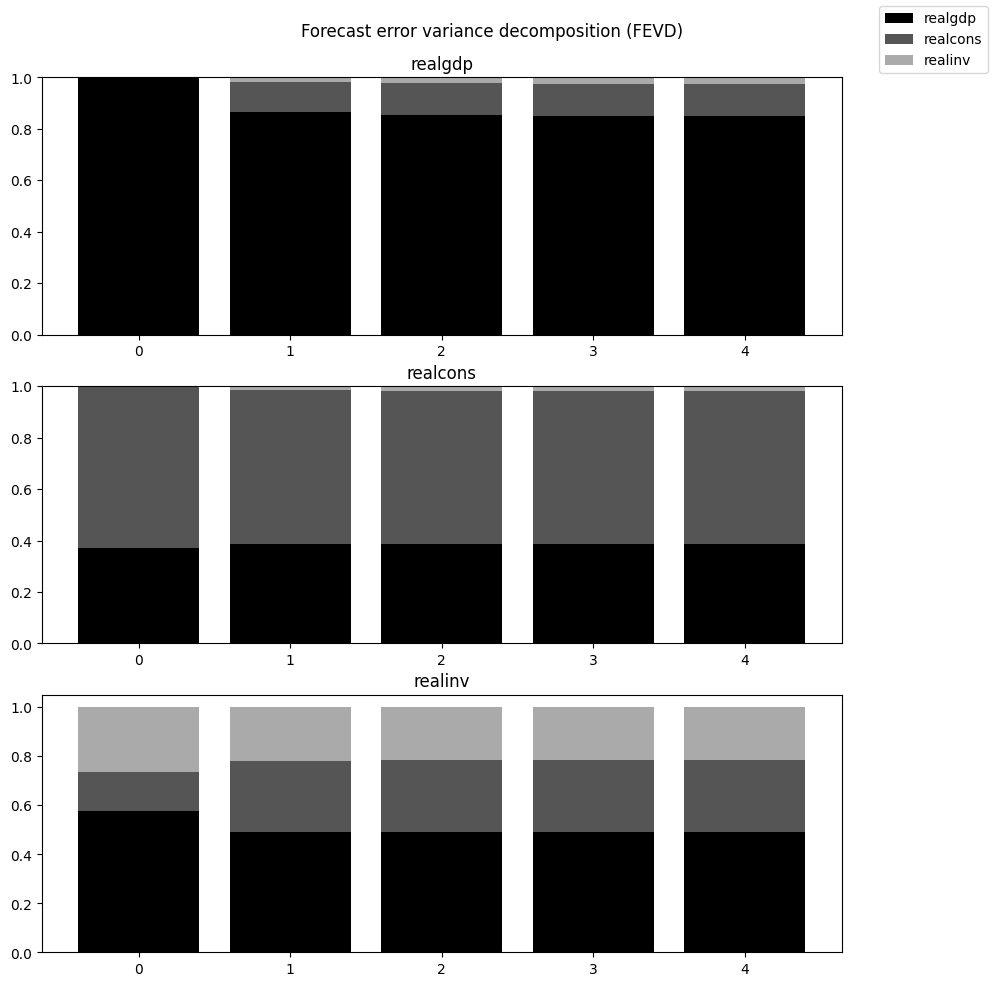

In [106]:
results.fevd(5).plot();

In [107]:
results.test_causality('realgdp', 'realcons', kind='f').summary()

Test statistic,Critical value,p-value,df
32.75,3.857,0.000,"(1, 591)"


In [108]:
results.test_causality('realcons', 'realgdp', kind='f').summary()

Test statistic,Critical value,p-value,df
0.8398,3.857,0.360,"(1, 591)"


In [109]:
results.test_normality().summary()

Test statistic,Critical value,p-value,df
28.71,12.59,0.000,6


<Axes: >

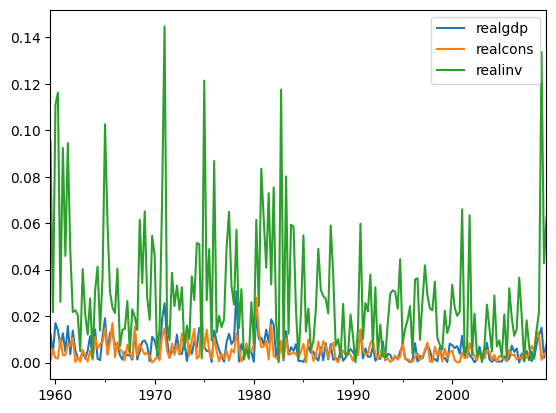

In [110]:
results.resid.abs().plot()

In [111]:
results.test_whiteness().summary()

Test statistic,Critical value,p-value,df
107.7,103.0,0.025,81
